# Proper and Common Noun Wordcloud Generator

For the HathiTrust Research Center's TORCHLITE extracted features API

1. First, we ask for the HathiTrust ID (HTID) of the text. We can use any HTID for an English volume.

In [33]:
htid = input("HathiTrust ID")

2. Then we connect to the API and get features for the text

In [34]:
import http.client
import json

conn = http.client.HTTPSConnection("data.htrc.illinois.edu")

headers = { 'Accept': "application/json" }

conn.request("GET", "/ef-api/volumes/" + htid, headers=headers)

res = conn.getresponse()
data = json.loads(res.read().decode("utf-8"))

3. Now we ask for the starting and ending pages and adjust to 0 or last page, respectively, if enter was pressed

In [35]:
start_page = input("Starting page (enter for 0)")
end_page = input("Ending page (enter for last page)")

page_count = data["data"]["features"]["pageCount"]

if start_page == "":
    start_page = str(0)

if end_page == "":
    end_page = str(page_count)

if int(end_page) > page_count:
    end_page = str(page_count)

start_page = start_page.zfill(8)
end_page = end_page.zfill(8)

4. Then we iterate over the page bodies and add tokens tagged NNP, NNPS, NN, and NNS to our lists. See the [Penn Treebank part-of-speech tags](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) for a key to the tags.

In [36]:
proper_nouns = []
regular_nouns = []

pages = data["data"]["features"]["pages"]

for page in pages:
    if page["seq"] > end_page:
        break

    if page["seq"] < start_page:
        continue

    if page is None or page["body"] is None:
        continue 
       
    pos_count = page["body"]["tokenPosCount"]

    for key in pos_count.keys():
        if pos_count[key].get('NNP') is not None or pos_count[key].get('NNPS') is not None:
            proper_nouns.append(key.lower())
        if pos_count[key].get('NN') is not None or pos_count[key].get('NNS') is not None:
            regular_nouns.append(key.lower())            

5. Then we convert lists of tokens to counts

In [37]:
from collections import Counter
counts = Counter(proper_nouns)
regular_counts = Counter(regular_nouns)

6. Now we display the word cloud of proper nouns

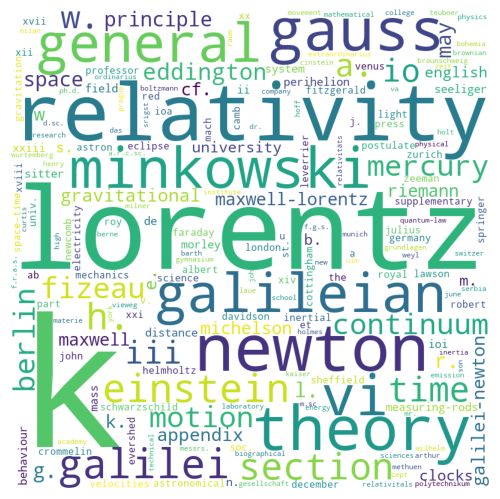

In [38]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(counts)
 
plt.figure(facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Finally we display word cloud of common nouns

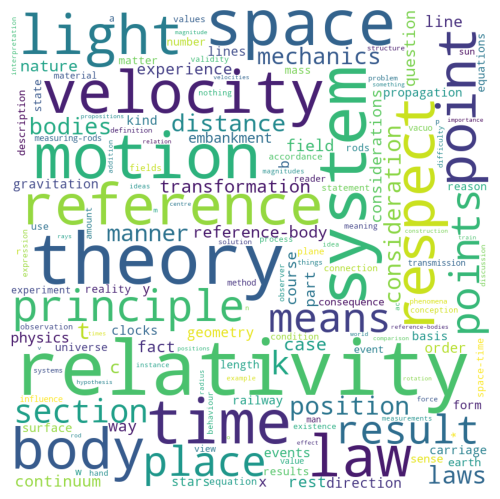

In [39]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(regular_counts)
 
plt.figure(facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()